<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   grade          21613 non-null  int64  
 8   sqft_above     21613 non-null  int64  
 9   sqft_living15  21613 non-null  int64  
 10  sqft_lot15     21613 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 1.8+ MB
None
id               0
date             0
price            0
bedrooms         0
sqft_living      0
sqft_lot         0
floors           0
grade            0
sqft_above       0
sqft_living15    0
sqft_lot15       0
dtype: int64
   bedrooms    floors     grad

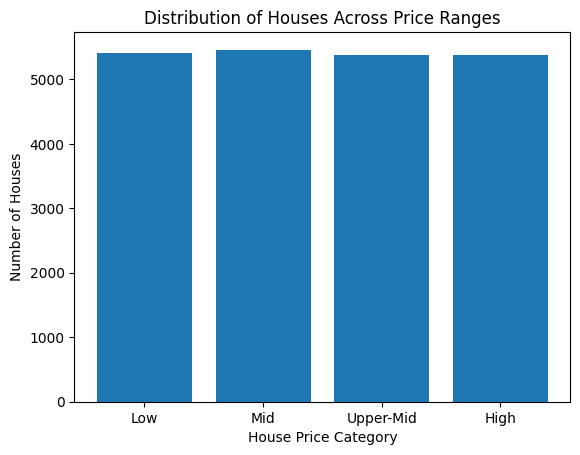

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler


df = pd.read_excel("ML470_S9_KCHouse_Data_Practice.xlsx")




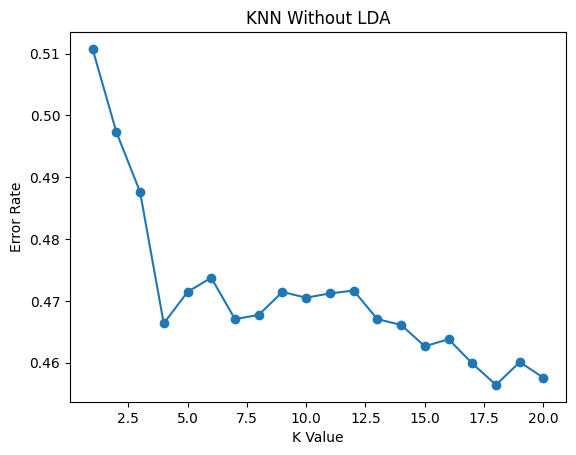

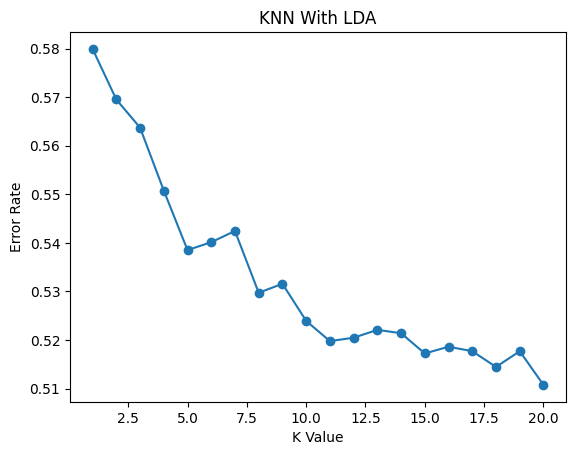


KNN WITHOUT LDA
Accuracy : 0.5436039787184825
Precision: 0.5369727738658993
Recall   : 0.5436039787184825
F1-score : 0.5373297064480183

KNN WITH LDA
Accuracy : 0.4892435808466343
Precision: 0.4751539774080629
Recall   : 0.4892435808466343
F1-score : 0.47843779653507346

ROC-AUC WITH LDA: 0.7494344424376618


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

y = df["price_range_encoded"]

# Features
X = df.drop(["price_range", "price_range_encoded"], axis=1)

# ===============================
# 2. Train Test Split
# ===============================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===============================
# 3. Feature Scaling
# ===============================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ======================================================
# PART A — KNN WITHOUT DIMENSIONALITY REDUCTION
# ======================================================

error_rate_original = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred = knn.predict(X_test_scaled)
    error_rate_original.append(np.mean(pred != y_test))

# Plot error vs K
plt.figure()
plt.plot(range(1, 21), error_rate_original, marker='o')
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.title("KNN Without LDA")
plt.show()

# Optimal K
best_k_original = error_rate_original.index(min(error_rate_original)) + 1

# Train final model
knn_original = KNeighborsClassifier(n_neighbors=best_k_original)
knn_original.fit(X_train_scaled, y_train)
pred_original = knn_original.predict(X_test_scaled)

# ======================================================
# PART B — LDA DIMENSIONALITY REDUCTION
# ======================================================

lda = LinearDiscriminantAnalysis(n_components=2)

X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# ======================================================
# 4. Find Optimal K (LDA)
# ======================================================

error_rate_lda = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_lda, y_train)
    pred = knn.predict(X_test_lda)
    error_rate_lda.append(np.mean(pred != y_test))

# Plot error vs K
plt.figure()
plt.plot(range(1, 21), error_rate_lda, marker='o')
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.title("KNN With LDA")
plt.show()

best_k_lda = error_rate_lda.index(min(error_rate_lda)) + 1

# ======================================================
# 5. Final KNN Model with LDA
# ======================================================

knn_lda = KNeighborsClassifier(n_neighbors=best_k_lda)
knn_lda.fit(X_train_lda, y_train)
pred_lda = knn_lda.predict(X_test_lda)

# ======================================================
# 6. Model Evaluation
# ======================================================

def evaluate(y_true, y_pred, name):
    print(f"\n{name}")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average="weighted"))
    print("Recall   :", recall_score(y_true, y_pred, average="weighted"))
    print("F1-score :", f1_score(y_true, y_pred, average="weighted"))

evaluate(y_test, pred_original, "KNN WITHOUT LDA")
evaluate(y_test, pred_lda, "KNN WITH LDA")

# ROC-AUC (multiclass)
print("\nROC-AUC WITH LDA:",
      roc_auc_score(y_test,
                    knn_lda.predict_proba(X_test_lda),
                    multi_class="ovr"))